### 클로라이드(Chlorides) 규칙 찾기

In [2]:
import pandas as pd

df = pd.read_csv('winequality-red.csv')
df1=df.drop_duplicates()

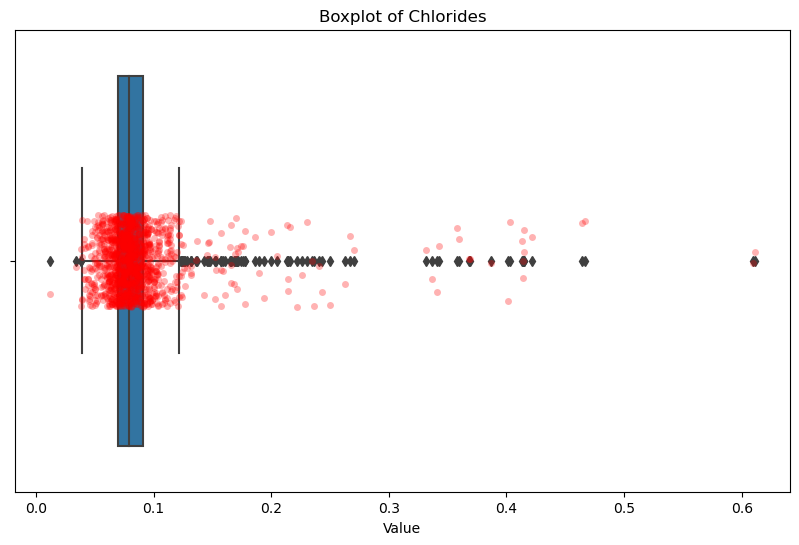

In [9]:
# Boxplot 그리기
import seaborn as sns
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['chlorides'], whis=1.5)  # whis 조절
sns.stripplot(x=df1['chlorides'], color='red', marker='o', alpha=0.3)  # 이상치 마커 설정
plt.title('Boxplot of Chlorides')
plt.xlabel('Value')
plt.show()   

Cumulative Distribution of Outliers in column 'Chlorides' :
Number of outliers: 87


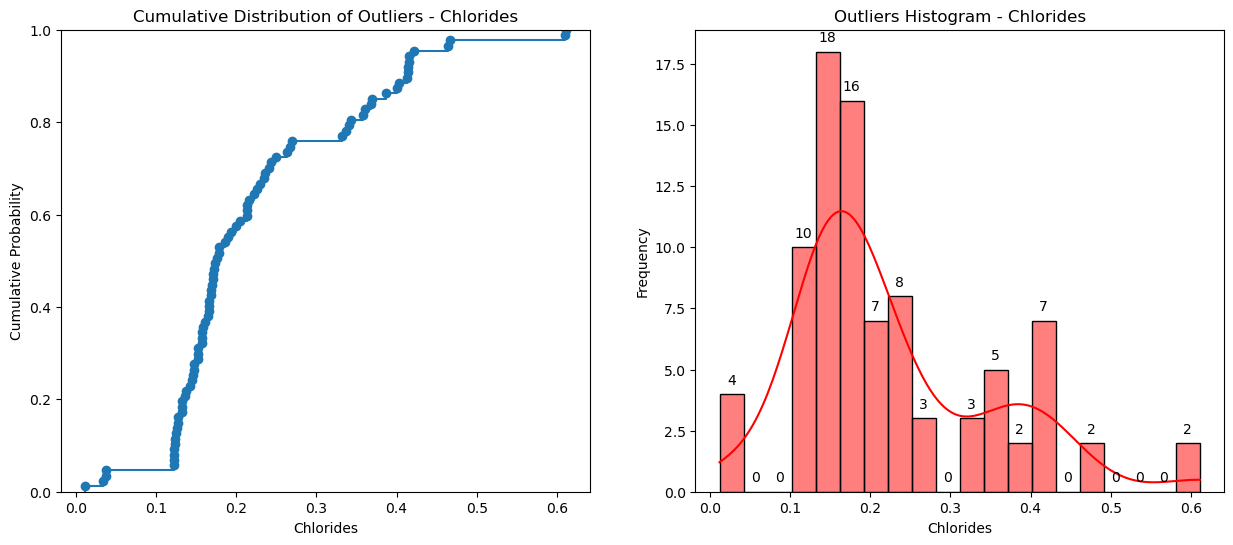

In [17]:
# 이상치 누적분포 함수 & 이상치의 히스토그램

print(f"Cumulative Distribution of Outliers in column 'Chlorides' :")
    

# IQR 계산
Q1 = df1['chlorides'].quantile(0.25)
Q3 = df1['chlorides'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 추출
chlorides_outliers = df1[(df1['chlorides'] < lower_bound) | (df1['chlorides'] > upper_bound)]['chlorides']
    
# 이상치를 크기순으로 정렬
sorted_outliers = chlorides_outliers.sort_values()

# 이상치 개수 출력
outlier_count = sorted_outliers.count()
print(f"Number of outliers: {outlier_count}")
    
# 이상치 누적분포 함수 그리기
plt.figure(figsize=(15, 6))
    
plt.subplot(1, 2, 1)  # 그리드 1행 2열 중 첫 번째 subplot
sns.ecdfplot(sorted_outliers, marker='o', linestyle='-')
plt.title(f"Cumulative Distribution of Outliers - Chlorides")
plt.xlabel('Chlorides')
plt.ylabel("Cumulative Probability")
    
plt.subplot(1, 2, 2)  # 그리드 1행 2열 중 두 번째 subplot
ax = sns.histplot(sorted_outliers, bins=20, kde=True, color='red')
plt.title(f"Outliers Histogram - Chlorides")
plt.xlabel('Chlorides')
plt.ylabel("Frequency")

for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [35]:
#정규성 검사

from scipy.stats import shapiro
import numpy as np

# 샤피로-윌크 검정 수행
statistic, p_value = shapiro(sorted_outliers)

# 결과 출력
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# P-value를 기준으로 귀무가설의 기각 여부 판단
alpha = 0.05
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다. (귀무가설을 기각하지 않음)")
else:
    print("데이터는 정규 분포를 따르지 않습니다. (귀무가설을 기각)")

Shapiro-Wilk Test Statistic: 0.8841235041618347
P-value: 1.1971534377153148e-06
데이터는 정규 분포를 따르지 않습니다. (귀무가설을 기각)


In [25]:
# 평균, 표준편차, 최소, 최대, 사분위값
sorted_outliers.describe()

count    87.000000
mean      0.224862
std       0.121294
min       0.012000
25%       0.146500
50%       0.176000
75%       0.268500
max       0.611000
Name: chlorides, dtype: float64

In [30]:
# 이상치 비율
chlorides_outliers.rate = sorted_outliers.count()/df1['chlorides'].count()
print("전체 Chlorides 이상치 비율 :", chlorides_outliers.rate)

전체 Chlorides 이상치 비율 : 0.0640176600441501


In [34]:
import pandas as pd
from scipy.stats import shapiro
import numpy as np

# Series에서 수치 0.2를 기준으로 이하의 값을 가지는 데이터만 남기기
threshold = 0.2
filtered_series = sorted_outliers[sorted_outliers > threshold]

# 정규성 검정 수행
statistic, p_value = shapiro(filtered_series)

# 결과 출력
print(f"Shapiro-Wilk Test for the Series:")
print(f"  - Shapiro-Wilk Test Statistic: {statistic}")
print(f"  - P-value: {p_value}")

# P-value를 기준으로 귀무가설의 기각 여부 판단
alpha = 0.05
if p_value > alpha:
    print("    => 데이터는 정규 분포를 따릅니다 (귀무가설을 기각하지 않음)")
else:
    print("    => 데이터는 정규 분포를 따르지 않습니다 (귀무가설을 기각)")

Shapiro-Wilk Test for the Series:
  - Shapiro-Wilk Test Statistic: 0.8967941999435425
  - P-value: 0.0024037729017436504
    => 데이터는 정규 분포를 따르지 않습니다 (귀무가설을 기각)


In [43]:
# 여러 임계값에 대해 검정 수행
thresholds = np.arange(0.01, 0.61, 0.01)
p_values = []



for threshold in thresholds:
    filtered_series = sorted_outliers[sorted_outliers > threshold]
    statistic, p_value = shapiro(filtered_series)
    
    p_values.append(p_value)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, p_values, marker='o', linestyle='-', color='b')
plt.title('Effect of Threshold on Shapiro-Wilk Test')
plt.xlabel('Threshold')
plt.ylabel('P-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()

ValueError: Data must be at least length 3.

In [45]:
# 여러 임계값에 대해 검정 수행
thresholds = np.arange(0.01, 0.61, 0.01)
p_values = []

sorted_outliers= pd.DataFrame(sorted_outliers)
sorted_outliers

for threshold in thresholds:
    filtered_data = sorted_outliers[sorted_outliers > threshold].dropna()
    statistic, p_value = shapiro(filtered_data.values.flatten())
    p_values.append(p_value)

# DataFrame으로 결과 저장
result_df = pd.DataFrame({'Threshold': thresholds, 'P-value': p_values})

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(result_df['Threshold'], result_df['P-value'], marker='o', linestyle='-', color='b')
plt.title('Effect of Threshold on Shapiro-Wilk Test')
plt.xlabel('Threshold')
plt.ylabel('P-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()

ValueError: Data must be at least length 3.

In [46]:
sorted_outliers= pd.DataFrame(sorted_outliers)
sorted_outliers

,chlorides
836,0.012
695,0.034
797,0.038
1571,0.038
1020,0.123
...,...
692,0.422
81,0.464
106,0.467
151,0.610
